###  Modelling using Linear Regression  

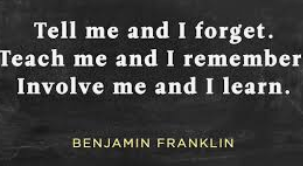

<a id=section1></f>
## Definition


Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.
- Simple Linear Regression

Simple linear regression is an approach for predicting a response using a single feature.
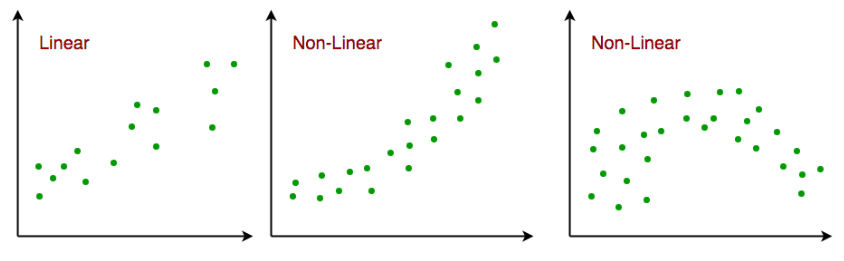

#### WHY Linear Regression?
- To find the parameters so that the model **best fits** the data.
- Forecasting an effect
- Determing a Trend
#### How do we determine the best fit line? 
- The line for which the the error between the **predicted** values and the **observed** values is minimum is called the best fit line or the regression line. These errors are also called as **residuals**. 
- The residuals can be visualized by the vertical lines from the observed data value to the **regression line**.

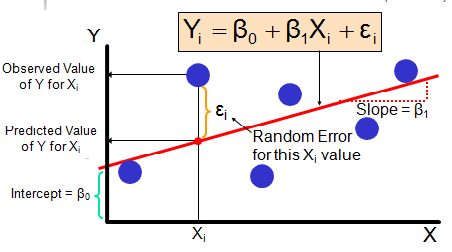



- Now, the task is to find a line which fits best in above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in dataset)
This line is called regression line.

The equation of regression line is represented as:

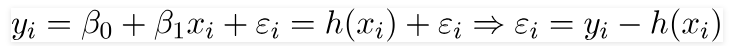

Here,

h(x<sub>i</sub>) represents the predicted response value for ith observation.
b(<sub>0</sub>) and b(<sub>1</sub>) are regression coefficients and represent y-intercept and slope of regression line respectively.

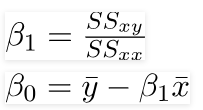
where (SS<sub>xx</sub>) is the sum of cross-deviations of y and x:

<a id=section3></f>
## Multiple linear regression


Multiple linear regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data.

Clearly, it is nothing but an extension of Simple linear regression.

Consider a dataset with p features(or independent variables) and one response(or dependent variable).
Also, the dataset contains n rows/observations.
The regression line for p features is represented as:
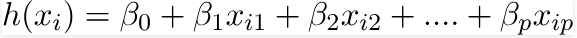
where h(x_i) is predicted response value for ith observation and b_0, b_1, …, b_p are the regression coefficients.

### Scikit -Learn
 - A library for machine learning for python language
 - Contains tools for machine learning algorithm and stats modelling
 
#### Installation
- conda install scikit-learn

### link to download pandas profiling module:
conda install -c conda-forge pandas-profiling 

## Objective: To predict car price on basics of features like eng Volume, Cylinders, Doors, Drive Wheels etc

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [17]:
c_data=pd.read_csv("car_price.csv") 

In [18]:
c_data.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45774419,8467,0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4,Variator,Front,Right-hand drive,Black,2
1,45756839,26657,0,LEXUS,RX 350,2007,Jeep,1,Petrol,3.5,128500,6,Automatic,4x4,Left wheel,Silver,12


In [10]:
c_data.shape

(19237, 17)

In [11]:
m=c_data.isnull().sum()
miss= (c_data.isnull().sum()/len(c_data))*100
miss_data=pd.concat([m,miss],axis=1,keys=['Total','%'])
print(miss_data)

                  Total    %
ID                    0  0.0
Price                 0  0.0
Levy                  0  0.0
Manufacturer          0  0.0
Model                 0  0.0
Prod. year            0  0.0
Category              0  0.0
Leather interior      0  0.0
Fuel type             0  0.0
Engine volume         0  0.0
Mileage               0  0.0
Cylinders             0  0.0
Gear box type         0  0.0
Drive wheels          0  0.0
Wheel                 0  0.0
Color                 0  0.0
Airbags               0  0.0


In [12]:
#c_data = c_data.drop(['registration','car','price','model'],axis=1)
X = c_data[['Levy','Leather interior','Mileage','Cylinders','Airbags']]
y = c_data[['Price']]

In [13]:
c_data.describe()

,ID,Price,Levy,Prod. year,Leather interior,Mileage,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,632.528669,2010.912824,0.725373,1.532236e+06,4.582991,6.582627
std,9.365914e+05,1.905813e+05,567.721688,5.668673,0.446338,4.840387e+07,1.199933,4.320168
min,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,0.000000,2009.000000,0.000000,7.013900e+04,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,642.000000,2012.000000,1.000000,1.260000e+05,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,917.000000,2015.000000,1.000000,1.888880e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,1.000000,2.147484e+09,16.000000,16.000000


In [14]:
c_data.describe(include="object")

,Manufacturer,Model,Category,Fuel type,Engine volume,Gear box type,Drive wheels,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,65,1590,11,7,107,4,3,2,16
top,HYUNDAI,Prius,Sedan,Petrol,2,Automatic,Front,Left wheel,Black
freq,3769,1083,8736,10150,3916,13514,12874,17753,5033


In [15]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  int64 
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  int64 
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  int64 
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Wheel             19237 non-null  object
 15  Color             19237 non-null  object
 16  Airbags           19237 non-null  int64 
dtypes: int64(8),

In [23]:
## we’ll split the dataset into a train set and a test set. 
## Scikit-learn has a very straightforward train_test_split function for that.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                  random_state=1)

###  Feature Importance for selection
One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. 

The correlation coefficient has values between -1 to 1
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

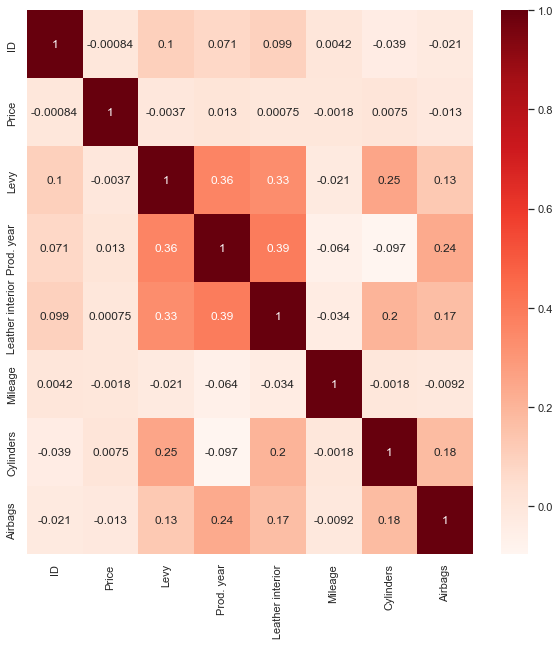

In [46]:
#Using Pearson Correlation
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.figure(figsize=(10,10))
cor = c_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [47]:
#Correlation with output variable
cor_target = abs(cor["Price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.40]
relevant_features

Price    1.0
Name: Price, dtype: float64

### RFE (Recursive Feature Elimination)
The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [24]:
X.head()

,Levy,Leather interior,Mileage,Cylinders,Airbags
0,0,0,200000,4,2
1,0,1,128500,6,12
2,0,0,0,8,0
3,0,0,350000,4,4
4,0,0,230000,4,0


## The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

## The estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [56]:
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,n_features_to_select=5)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True]
[1 1 1 1 1]


### Lets build the regression model. First, let’s try a model with only one variable.

In [25]:
reg = LinearRegression()
reg.fit(X_train[['Airbags']], y_train)

LinearRegression()

In [26]:
print(reg.intercept_)  

[23291.90699458]


In [27]:
print(reg.coef_)  

[[-673.31735272]]


price = -132(airbags) +18004

In [29]:
y_predicted = reg.predict(X_test[['Cylinders']])

C:\Users\suyashi144893\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cylinders
Feature names seen at fit time, yet now missing:
- Airbags

  warnings.warn(message, FutureWarning)


###  Evaluation metrics for linear regression are mean squared error and the R² score.
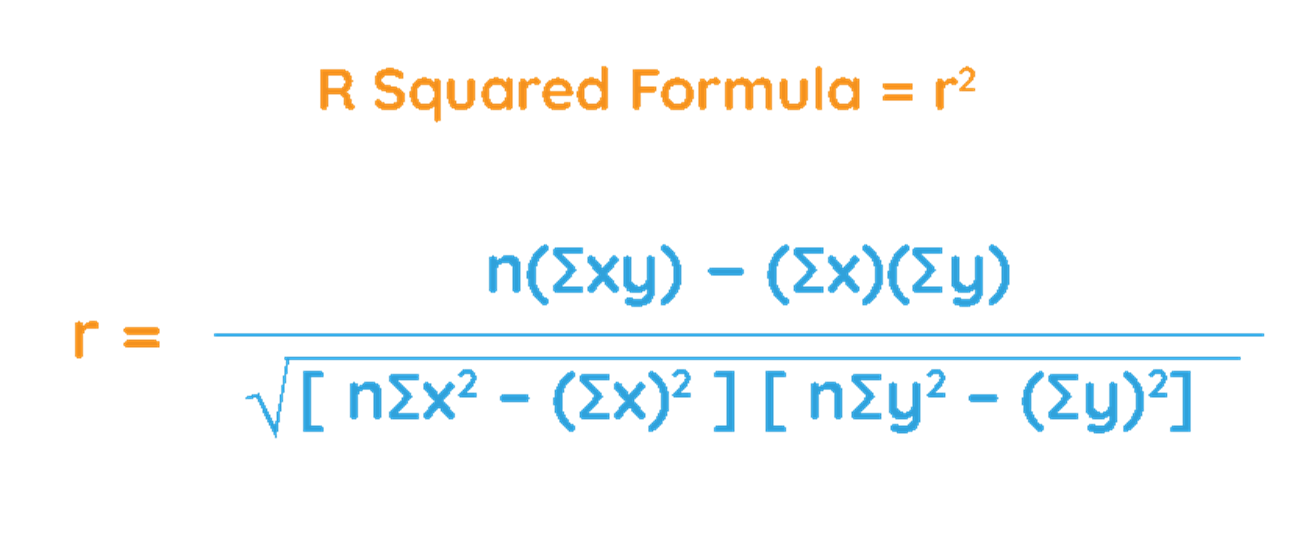

## Evaluating the Algorithm

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

- **Mean Absolute Error (MAE) is the mean of the absolute value of the errors**
- **Mean Squared Error (MSE) is the mean of the squared errors**
- **Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors*

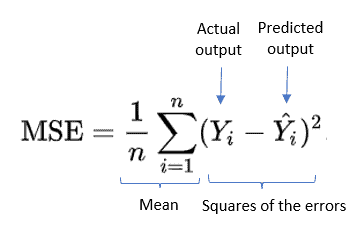

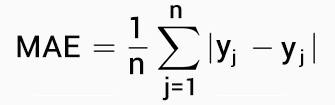

In [30]:

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))  
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean Absolute Error: 13571.669539918457
Mean Squared Error: 622299969.3311057
Root Mean Squared Error: 24945.940938980548
R²: -0.02


- Linear regression calculates an equation that minimizes the distance between the fitted line and all of the data points.
- R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
- R-squared = Explained variation / Total variation

- R-squared is always between 0 and 100%:
0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data.

### Insights

- The **best** possible score is **1.0**, We get a model with a mean squared error of **27** and an R² of**0.56**. Not so good

### Let’s add more variables to the model weight and cylinders(Multi)

In [31]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))  
print('R²: %.2f' % r2_score(y_test, y_predicted))
#print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))


Mean Absolute Error: 13168.156972021849
Mean Squared Error: 611353721.5927002
Root Mean Squared Error: 24725.568175326127
R²: -0.00


In [32]:
print(reg.coef_)

[[-1.99815451e+00  4.11314295e+01 -7.50737441e-06  1.63425923e+03
  -7.22806164e+02]]


## Performance Improvement by Cross validation
In this approach, we reserve 50% of the dataset for validation and the remaining 50% for model training. However, a major disadvantage of this approach is that since we are training a model on only 50% of the dataset, there is a huge possibility that we might miss out on some interesting information about the data which will lead to a higher bias

In [33]:
from sklearn.model_selection import train_test_split  
train, validation = train_test_split(c_data, test_size=0.50, random_state = 5)

In [34]:
X_train, X_v, y_train, y_v = train_test_split(X, y, test_size=0.5, random_state=5) 
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression()

In [35]:
print(reg.intercept_)

[7651.31375545]


In [36]:
print(reg.coef_)

[[-6.65773637e-01  5.03624161e+03 -4.01759296e-06  1.76215909e+03
  -2.79763913e+02]]


In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))  
print('R²: %.2f' % r2_score(y_test, y_predicted))


Mean Absolute Error: 13168.156972021849
Mean Squared Error: 611353721.5927002
Root Mean Squared Error: 24725.568175326127
R²: -0.00


## Model Correction
One commonly used method for doing this is known as k-fold cross-validation , which uses the following approach: 
- 1. Randomly divide a dataset into k groups, or “folds”, of roughly equal size. 
- 2. Choose one of the folds to be the holdout set. Fit the model on the remaining k-1 folds

cv=7

In [38]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=7)
scores  

array([0.03029924, 0.02478508, 0.02336647, 0.02565161, 0.02725892,
       0.01954999, 0.0159742 ])

In [39]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-3.79698833e+08, -2.95794825e+08, -2.86567261e+08, -3.05983212e+08,
       -7.24886091e+08])

## Conclusion
With above features we are not getting valid output for Linear regression